In [1]:
#import preliminaries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nfl = pd.read_excel('Data/NFL Ratings.xlsx')
barley = pd.read_excel('Data/barley-60.xlsx')
poultry = pd.read_excel('Data/Poultry Price.xlsx')
wing = pd.read_csv('Data/Jumbo Wing Price Monthly Comparison.csv')

In [3]:
nfl.head()
nfl_group = nfl.groupby(["Month", "Year"])
nfl_mean = nfl_group.mean()
nfl_mean.reset_index(inplace=True)
nfl_mean.head()

,Month,Year,RTG,+/-,VWRS in millions
0,Aug,2017,1.485652,0.076957,2.377522
1,Aug,2018,1.445652,0.133913,2.382565
2,Dec,2014,9.911538,0.009231,16.561154
3,Dec,2015,10.812500,0.010625,18.656250
4,Dec,2016,9.669444,0.122222,17.577778


In [4]:
wing.head()

,Month,Year,Price
0,Jan,2009,1.3557
1,Feb,2009,1.4300
2,Mar,2009,1.4105
3,Apr,2009,1.3214
4,May,2009,1.3200


In [5]:
barley.head()

,Date,Month,Year,Comodity,Price,Change
0,2014-02-01,Feb,2014,Barley,169.94,-
1,2014-03-01,Mar,2014,Barley,177.75,0.046
2,2014-04-01,Apr,2014,Barley,181.42,0.0206
3,2014-05-01,May,2014,Barley,181.88,0.0025
4,2014-06-01,Jun,2014,Barley,160.29,-0.1187


In [6]:
nfl_mean["period"] = nfl_mean["Year"].map(str) + nfl_mean["Month"]
wing["period"] = wing["Year"].map(str) + wing["Month"]

In [7]:
nfl_mean.head()

,Month,Year,RTG,+/-,VWRS in millions,period
0,Aug,2017,1.485652,0.076957,2.377522,2017Aug
1,Aug,2018,1.445652,0.133913,2.382565,2018Aug
2,Dec,2014,9.911538,0.009231,16.561154,2014Dec
3,Dec,2015,10.812500,0.010625,18.656250,2015Dec
4,Dec,2016,9.669444,0.122222,17.577778,2016Dec


In [9]:
ratings_wing_price = wing.merge(nfl_mean, left_on='period', right_on='period')
ratings_wing_price.head()

,Month_x,Year_x,Price,period,Month_y,Year_y,RTG,+/-,VWRS in millions
0,Oct,2014,1.6778,2014Oct,Oct,2014,10.315385,0.258846,17.194231
1,Nov,2014,1.5956,2014Nov,Nov,2014,10.668966,-0.009655,18.468621
2,Dec,2014,1.5324,2014Dec,Dec,2014,9.911538,0.009231,16.561154
3,Jan,2015,1.7090,2015Jan,Jan,2015,20.380000,-0.050000,36.349000
4,Feb,2015,1.6275,2015Feb,Feb,2015,47.500000,0.020000,114.440000


In [10]:
ratings_wing_price.sort_values(by=['period'], inplace=True)
ratings_wing_price.head()

,Month_x,Year_x,Price,period,Month_y,Year_y,RTG,+/-,VWRS in millions
2,Dec,2014,1.5324,2014Dec,Dec,2014,9.911538,0.009231,16.561154
1,Nov,2014,1.5956,2014Nov,Nov,2014,10.668966,-0.009655,18.468621
0,Oct,2014,1.6778,2014Oct,Oct,2014,10.315385,0.258846,17.194231
7,Dec,2015,1.4977,2015Dec,Dec,2015,10.812500,0.010625,18.656250
4,Feb,2015,1.6275,2015Feb,Feb,2015,47.500000,0.020000,114.440000


In [14]:
ratings_wing_price

,Month_x,Year_x,Price,period,Month_y,Year_y,RTG,+/-,VWRS in millions
2,Dec,2014,1.5324,2014Dec,Dec,2014,9.911538,0.009231,16.561154
1,Nov,2014,1.5956,2014Nov,Nov,2014,10.668966,-0.009655,18.468621
0,Oct,2014,1.6778,2014Oct,Oct,2014,10.315385,0.258846,17.194231
7,Dec,2015,1.4977,2015Dec,Dec,2015,10.812500,0.010625,18.656250
4,Feb,2015,1.6275,2015Feb,Feb,2015,47.500000,0.020000,114.440000
3,Jan,2015,1.7090,2015Jan,Jan,2015,20.380000,-0.050000,36.349000
6,Nov,2015,1.4700,2015Nov,Nov,2015,9.966667,0.058333,17.144444
5,Oct,2015,1.5177,2015Oct,Oct,2015,11.040000,0.035000,18.383333
10,Dec,2016,1.7800,2016Dec,Dec,2016,9.669444,0.122222,17.577778
9,Nov,2016,1.7715,2016Nov,Nov,2016,10.136364,-0.020455,18.231818


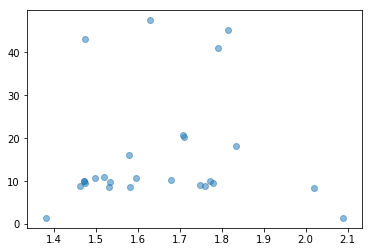

In [15]:
x = ratings_wing_price["Price"]
y = ratings_wing_price["RTG"]

plt.scatter(x, y, alpha=0.5)